# 시그모이드 함수

### 시그모이드 함수 그래프 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**1) 넘파이를 사용해 w는 1, b는 0임을 가정한 그래프를 시각화**

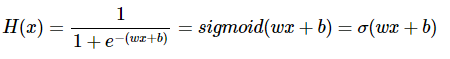

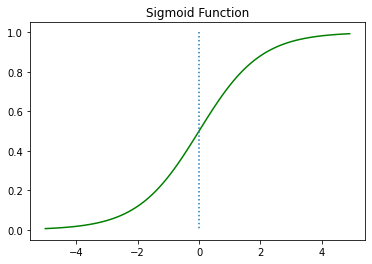

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 가중치 w와 편향 b가 출력값에 미치는 영향에 대한 시각화

**1) w의 값을 0.5, 1, 2로 변화시키고 그래프를 확인**

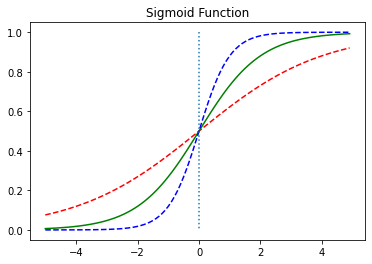

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

**2) b의 값을 +0.5, +1, +1.5로 변화시키고 그래프를 확인**

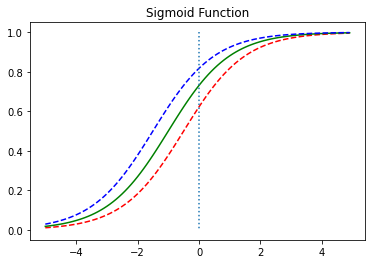

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

# 로지스틱 회귀 실습

### 케라스로 구현하는 로지스틱 회귀

**예) 총 200회에 걸쳐 전체 데이터에 대한 오차를 최소화하는 w와 b를 찾아내기**

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

**1) 독립 변수 데이터를 x, 숫자 10 이상인 경우는 1, 미만인 경우는 0을 부여한 레이블 데이터를 y라고 지정**<br>
**2) Sequential로 model이라는 이름의 모델을 생성**<br>
**3) add를 통해 시그모이드 함수를 추가**<br>
**4) 옵티마이저로 기본 경사 하강법을 사용하며, 학습률을 0.01로 하여 추가**<br>
**5) 손실 함수로는 크로스 엔트로피 함수를 사용하도록 binary_crossentropy를 추가**<br>
**6) 전체 데이터에 대한 훈련 횟수는 200으로 설정**

In [6]:
x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 3s 3s/step - loss: 34.8799 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 29.3756 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 23.8720 - binary_accuracy: 0.1538
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 18.3708 - binary_accuracy: 0.1538
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 12.8772 - binary_accuracy: 0.1538
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 7.4111 - binary_accuracy: 0.1538
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 2.1059 - binary_accuracy: 0.1538
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 0.2170 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 0.2144 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - 

**7) 실제값과 오차를 최소화하도록 값이 변경된 w와 b의 값을 가진 모델을 이용하여 그래프 그리기**

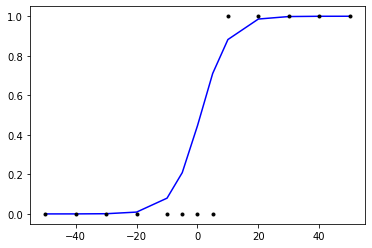

In [7]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

**8) x의 값이 5보다 작은 값일 때와 x의 값이 10보다 클 때에 대한 y값 출력**

In [8]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.5015882 ]
 [0.55708015]
 [0.61118305]
 [0.6626789 ]
 [0.6871307 ]]
[[0.9034384 ]
 [0.988634  ]
 [0.9987649 ]
 [0.99986696]
 [1.        ]]


# 다중 입력에 대한 실습 - 다중 로지스틱 회귀

### 케라스로 구현하는 다중 로지스틱 회귀

**예) y를 결정하는데 있어 독립 변수가 꽃받침의 길이와 꽃잎의 길이 2개와 해당 꽃이 A인지 B인지 적힌 데이터가 있을 때**<br>
&nbsp; &nbsp; &nbsp;**새로 조사한 꽃받침의 길이와 꽃잎의 길이로부터 무슨 꽃인지 예측할 수 있는 다중 로지스틱 회귀 문제**

**1) 두 개의 입력 x1(꽃받침의 길이), x2(꽃잎의 길이)의 합이 2이상이면 출력값 y가 1이 되고 미만이면 0이 되도록 함**<br>
**2) 입력의 차원이 2로 바뀌었으므로 시그모이드 함수 input_dim의 인자값을 2로 변경**<br>
**3) 옵티마이저로 기본 경사 하강법을 사용하며, 학습률을 0.0001로 하여 추가**<br>
**4) 손실 함수로는 크로스 엔트로피 함수를 사용하도록 binary_crossentropy를 추가**<br>
**5) 전체 데이터에 대한 훈련 횟수는 2000으로 설정**

In [9]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

Epoch 1/2000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 286ms/step - loss: 0.7977 - binary_accuracy: 0.6667
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7969 - binary_accuracy: 0.6667
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7960 - binary_accuracy: 0.6667
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7952 - binary_accuracy: 0.6667
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7944 - binary_accuracy: 0.6667
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7935 - binary_accuracy: 0.6667
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7927 - binary_accuracy: 0.6667
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7919 - binary_accuracy: 0.6667
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7911 - binary_accuracy: 0.6667
Epoch 10/2000
1/1 [==============================] - 0s 10ms/ste

**6) 각 입력에 대해서 출력값이 0.5보다 크고 작은지 확인**

In [10]:
print(model.predict(X))

[[0.17154077]
 [0.45966294]
 [0.44459102]
 [0.77753305]
 [0.7668299 ]
 [0.75577366]]
